In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
import os
for dirname, _, filenames in os.walk('../Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = r"../Datasets\UCI-Wisconsin-Breast-Cancer-Dataset.csv"

df = pd.read_csv(data, header=0)

../Datasets\heart_failure.csv
../Datasets\UCI-Wisconsin-Breast-Cancer-Dataset.csv
../Datasets\weatherAUS.csv


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.drop(columns=['id'], axis='columns', inplace=True)

In [7]:
all_columns = df.columns.tolist()
index_to_keep = all_columns.index('fractal_dimension_mean')
columns_to_drop = all_columns[index_to_keep+1:]

df.drop(columns=columns_to_drop, axis='columns', inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
X = df.drop(columns=['diagnosis'], axis=1)

y = df['diagnosis']

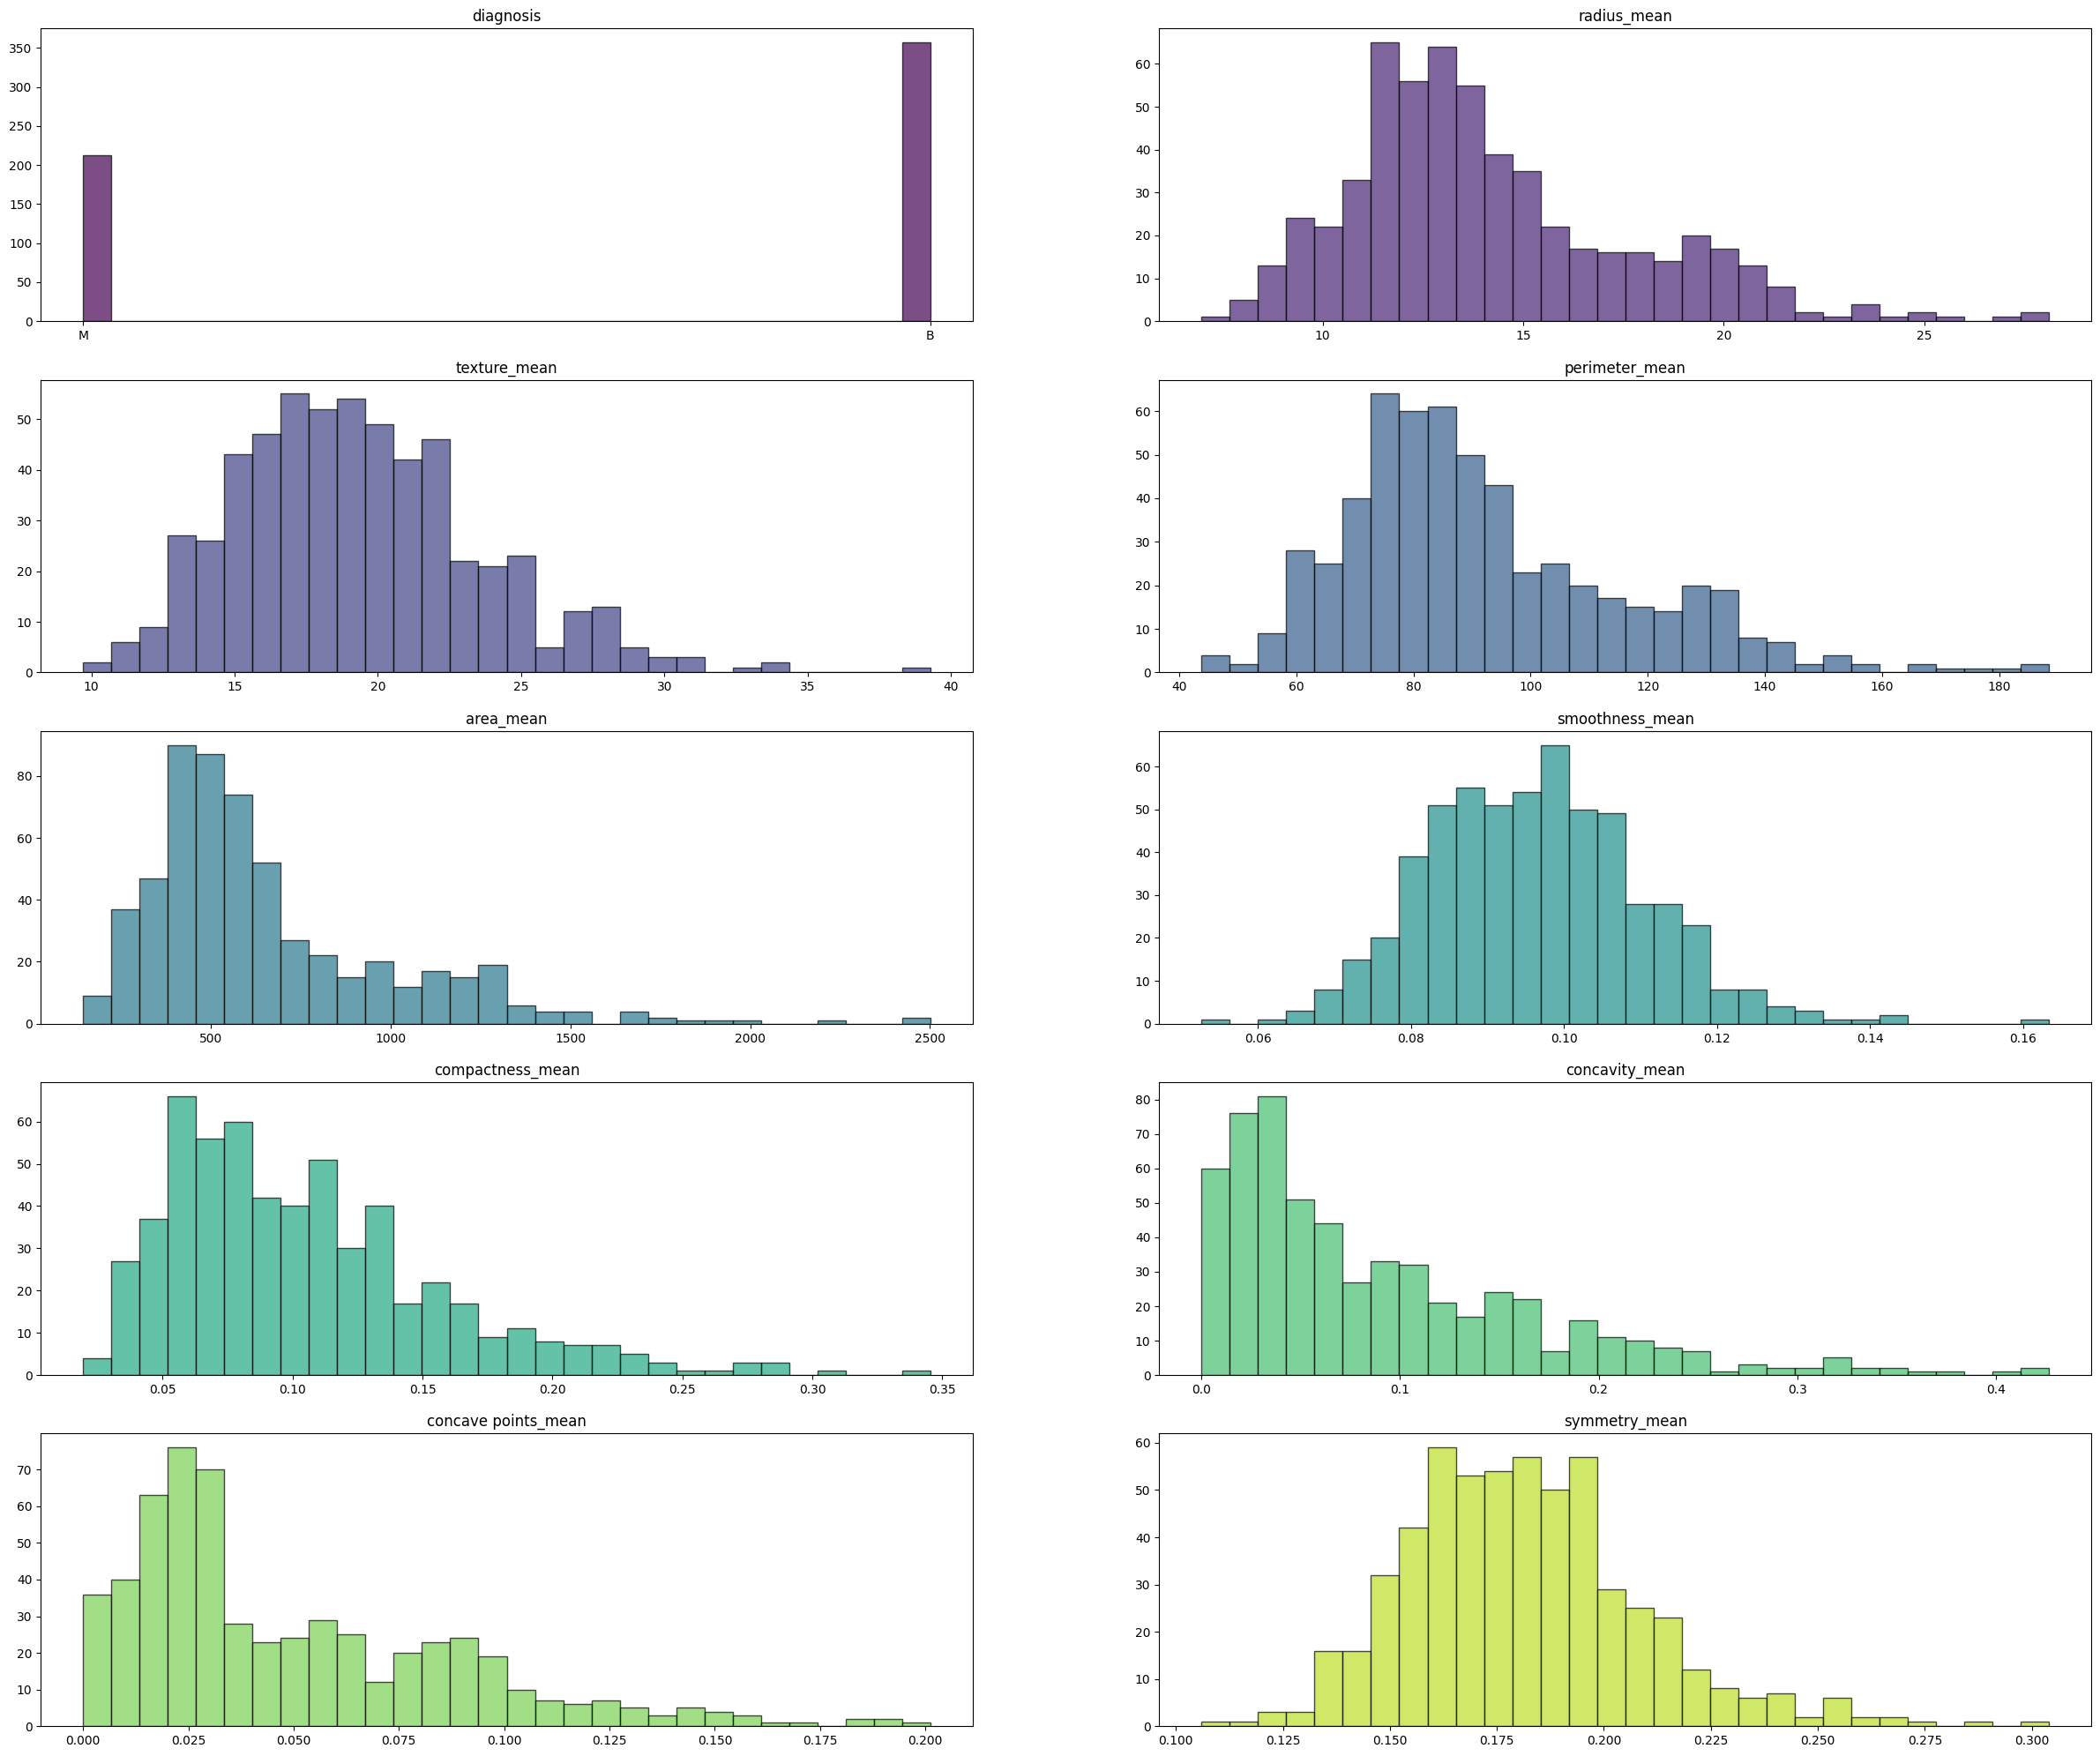

In [37]:
plt.rcParams['figure.figsize'] = (30, 25)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)))

# Iterate through each column and set xlim dynamically with different colors
for col, ax, color in zip(df.columns, axes.flatten(), colors):
    ax.hist(df[col], bins=30, alpha=0.7, color=color, edgecolor='black')
    ax.set_title(col)
    ax.set_xlim(auto=True)

plt.show()


In [11]:
"""print(df['diagnosis'].dtype)
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df['diagnosis'].values

df['diagnosis'].astype(np.int64)"""

"print(df['diagnosis'].dtype)\ndf['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)\ndf['diagnosis'].values\n\ndf['diagnosis'].astype(np.int64)"

In [12]:
correlation = df.corr(numeric_only=True)
correlation

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


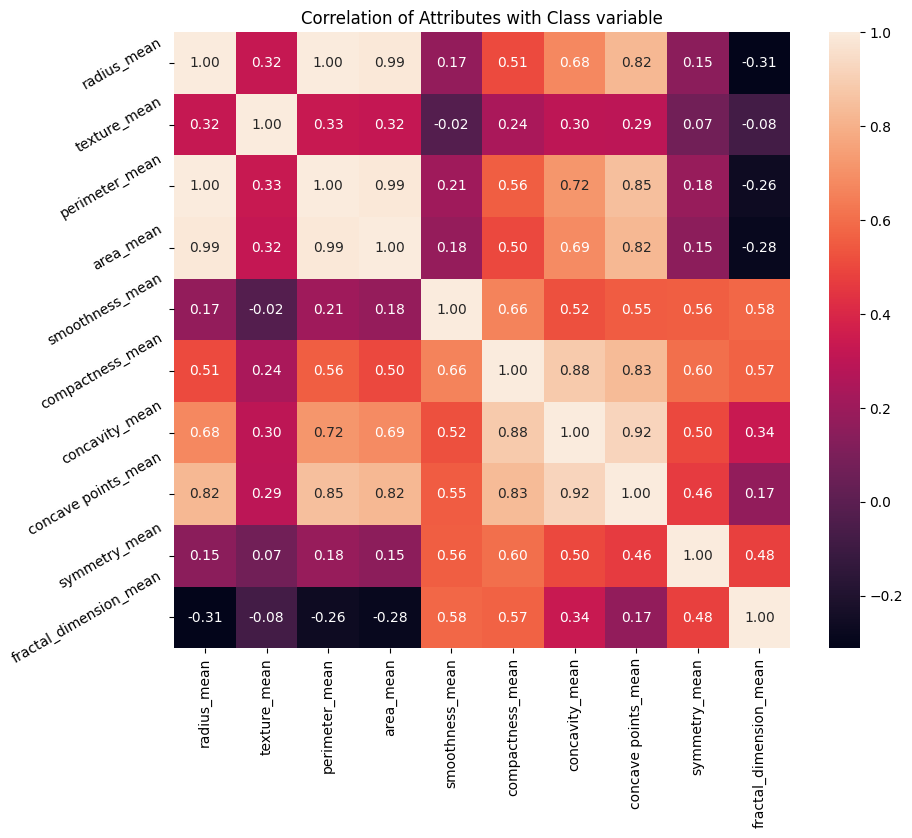

In [13]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape, X_test.shape

((455, 10), (114, 10))

In [16]:
y_train.shape, y_test.shape

((455,), (114,))

In [17]:
X_train.dtypes

radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [18]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [19]:
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939


In [22]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [23]:
y_pred = knn.predict(X_test)

y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [24]:
knn.predict_proba(X_test)[:,0]

array([0.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 ,
       0.5 , 1.  , 0.  , 0.5 , 0.25, 0.75, 0.  , 0.  , 0.  , 0.5 , 0.  ,
       0.75, 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 0.5 , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.75, 0.  , 0.  , 0.25, 1.  , 1.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 1.  , 0.75, 0.  , 1.  , 0.5 , 0.  , 0.75, 1.  ,
       0.25, 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       0.  , 0.  , 1.  , 0.75, 0.75, 0.  , 1.  , 1.  , 0.  , 0.75, 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.5 , 0.  , 0.5 , 0.  , 0.75, 1.  , 0.  ,
       1.  , 0.  , 0.  , 0.5 ])

In [25]:
knn.predict_proba(X_test)[:,1]

array([1.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 ,
       0.5 , 0.  , 1.  , 0.5 , 0.75, 0.25, 1.  , 1.  , 1.  , 0.5 , 1.  ,
       0.25, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
       1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 0.5 , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 1.  , 1.  , 0.75, 0.  , 0.  , 1.  , 0.  ,
       1.  , 1.  , 1.  , 0.  , 0.25, 1.  , 0.  , 0.5 , 1.  , 0.25, 0.  ,
       0.75, 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.25, 0.25, 1.  , 0.  , 0.  , 1.  , 0.25, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.5 , 1.  , 0.5 , 1.  , 0.25, 0.  , 1.  ,
       0.  , 1.  , 1.  , 0.5 ])

In [26]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9386


In [27]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9582


In [28]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9582
Test set score: 0.9386
